In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split


data = pd.read_csv("dataset/preprocessed.csv")

data = data.drop(data.columns[0],axis=1)

In [2]:
data = data.drop(data[data.target   ==  -1].index)

In [3]:
y = data.target

X = data.drop("target",axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

print(X_train.shape)
print(X_test.shape)

(571570, 42)
(190524, 42)


In [5]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state = 52, n_jobs = -1)

X_train, y_train = sm.fit_sample(X_train ,y_train)

In [6]:
print(X_train.shape)

(295997, 42)


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20),
                         n_estimators=500,
                         random_state=57)

clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, prediction))
print("f1 score: ", f1_score(y_test, prediction, average = 'weighted'))
print("Precision score: ", precision_score(y_test, prediction, average = 'weighted'))
print("Recall score: ", recall_score(y_test, prediction, average = 'weighted'))

Accuracy score:  0.37307110915160296
f1 score:  0.3818718311948354
Precision score:  0.408956033810486
Recall score:  0.37307110915160296


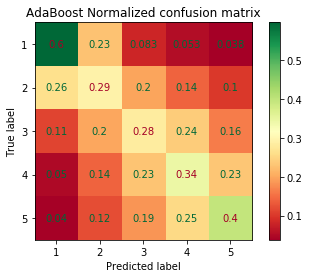

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

classes = ["1", "2", "3", "4", "5"]
title = "AdaBoost Normalized confusion matrix"
disp = plot_confusion_matrix(clf, X_test, y_test, display_labels = classes, cmap = "RdYlGn", normalize = "true")
disp.ax_.set_title(title)
plt.show()